# Stack-Overflow Developer Survey
We will try to answer 3 basic questions based on the data obtained from Stack-Overflow Developer Survey.

## Business Understanding
Based on the data obtained from Stack Overflow, we will take a closer look at the financial (income) side of the data. Since we have data from users from different nationalities, we would like to include the Country data in the analysis.

The questions we would like to answer are the following:
 1. Which nationals can see higher variation in salary?
 2. Which nationals can see larger gender pay gap?
 3. Which nationals can see better full-remote salaries compared to regular salaries?

## Data Understanding
First, let's give a look to the survey data.

In [2]:
#import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline

#Let's load the csv file
df = pd.read_csv('./stack-overflow-developer-survey-2017/survey_results_public.csv')
schema = pd.read_csv('./stack-overflow-developer-survey-2017/survey_results_schema.csv')

In [3]:
#Let's look at the shape of the dataframe
df.shape

(51392, 154)

In [4]:
#Let's look at the first data elements
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Let's look at the columns of the data
df.columns.values

array(['Respondent', 'Professional', 'ProgramHobby', 'Country',
       'University', 'EmploymentStatus', 'FormalEducation',
       'MajorUndergrad', 'HomeRemote', 'CompanySize', 'CompanyType',
       'YearsProgram', 'YearsCodedJob', 'YearsCodedJobPast',
       'DeveloperType', 'WebDeveloperType', 'MobileDeveloperType',
       'NonDeveloperType', 'CareerSatisfaction', 'JobSatisfaction',
       'ExCoderReturn', 'ExCoderNotForMe', 'ExCoderBalance',
       'ExCoder10Years', 'ExCoderBelonged', 'ExCoderSkills',
       'ExCoderWillNotCode', 'ExCoderActive', 'PronounceGIF',
       'ProblemSolving', 'BuildingThings', 'LearningNewTech',
       'BoringDetails', 'JobSecurity', 'DiversityImportant', 'AnnoyingUI',
       'FriendsDevelopers', 'RightWrongWay', 'UnderstandComputers',
       'SeriousWork', 'InvestTimeTools', 'WorkPayCare',
       'KinshipDevelopers', 'ChallengeMyself', 'CompetePeers',
       'ChangeWorld', 'JobSeekingStatus', 'HoursPerWeek', 'LastNewJob',
       'AssessJobIndustry', 'As

## Question 1
### Which nationals can see higher variation in salary?

Let's look at the income data per country and find the countries that have higher salary coefficient deviation (= standard deviation/mean).

### Data Preparation

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Extracting the Country and Salary columns
df1 = df[["Country","Salary"]]
#Selecting countries different from "I prefer not to say"
df1 = df1.loc[df1["Country"]!="I prefer not to say"]
#Selecting the rows where Salary is not NaN(we are not using NaNs for our calculation)
df1 = df1[np.isfinite(df1["Salary"])]
#Calculating the coefficient of variation (standard variation divided by the mean)
df1 = df1.groupby("Country").apply(lambda x: np.std(x) / np.mean(x))
#Sorting values
df1 = df1.sort_values(by=['Salary'])
df1

,Salary
Country,
Zimbabwe,0.000000
Nicaragua,0.000000
Mozambique,0.000000
Mongolia,0.000000
Cuba,0.000000
Mauritius,0.000000
Martinique (French),0.000000
Madagascar,0.000000
Guam,0.000000


### Results evaluation

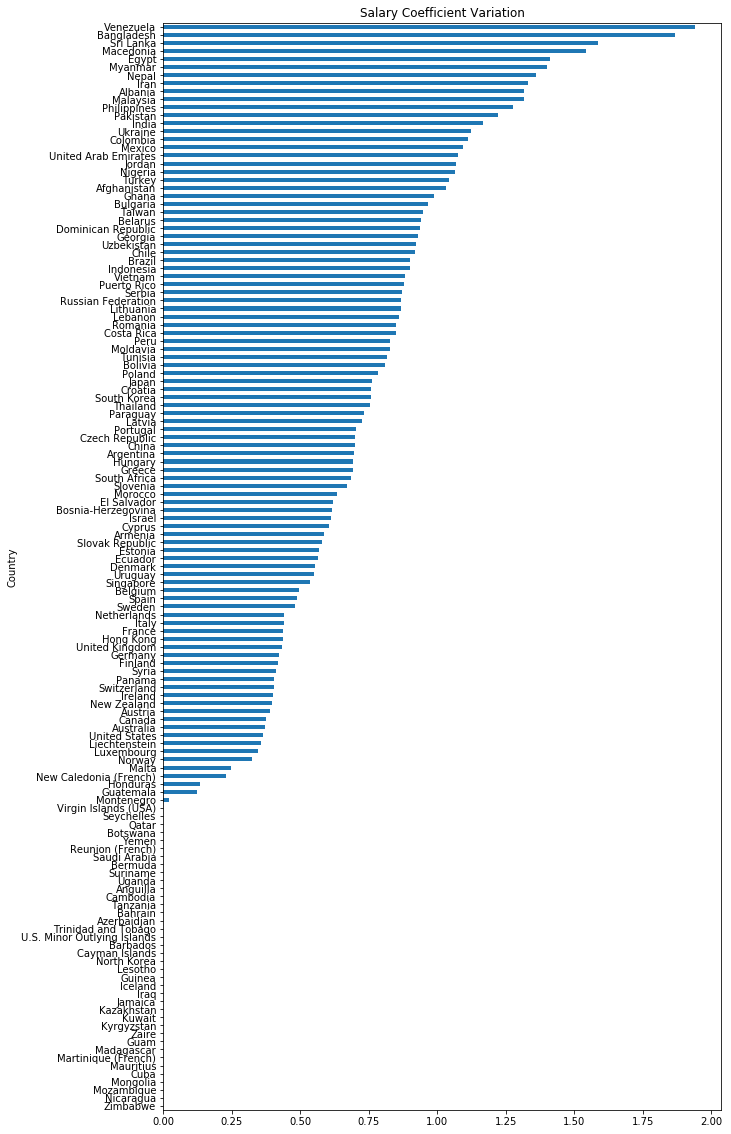

In [7]:
#Plotting the results
df1.plot(kind="barh",figsize=(10,20),title="Salary Coefficient Variation",legend=False)

From the plot we can see that the countries with more salary variation are:
* Venezuela
* Bangladesh
* Sri Lanka
* Macedonia
* Egypt

---
In order to answer the following two questions, we will use the following function for showing pivot tables:

In [21]:
def plot_function(df, values, columns, index, new_column, category_1, category_2):
    '''
    This function executes the following steps:
    1) Creates a pivot table from the passed dataframe. The arguments given are values, columns and index
    2) Drop NA of the obtained dataframe. These values don't add any new information to our calculation
    3) Create a new column for the dataframe and calculate the variation value based on the categories obtained from the pivot table 
    '''
    df_temp = df.pivot_table(values=values, columns=columns,index=[index],aggfunc='mean')
    df_temp = df_temp.dropna()
    df_temp[new_column] = 100*(df_temp[category_1] - df_temp[category_2])/df_temp[category_1]
    print(df_temp.sort_values(by=[new_column],ascending=False))

---
## Question 2
### Which nationals can see larger gender pay gap?

Let's look at the income data per country and find the countries that have higher gender pay gap.
Please notice that we will consider only "Male" and "Female" genders for this calculation.

### Data Preparation

In [17]:
#We prepare the data here so we can use the function we created
#Extracting Country, Gender and Salary Data
df_info = df[['Country','Gender','Salary']].dropna()
#Selecting only "Male" and "Female" genders
df_info = df_info[(df_info.Gender == 'Male')|(df_info.Gender == 'Female')]


### Results Evaluation

In [18]:
#Use the plot_function we created
plot_function(df_info, 'Salary', 'Gender', 'Country', 'Pay Gap', 'Male', 'Female')

Gender                     Female           Male      Pay Gap
Country                                                      
Ghana                  574.000000   94000.000000    99.389362
Uzbekistan            2400.000000   60000.000000    96.000000
Vietnam                650.000000   10600.000000    93.867925
Morocco                860.215054   11376.344086    92.438563
Malaysia              1566.209041   17635.125535    91.118810
Bangladesh            3035.000000   29919.360227    89.856067
Sri Lanka             2654.312149   22455.877337    88.179878
Czech Republic        3563.038371   22191.739917    83.944304
Ukraine               4012.567901   22592.672817    82.239517
Myanmar               1042.300009    5000.000000    79.154000
Cyprus               15376.344086   60349.462366    74.521158
Puerto Rico          30000.000000  114000.000000    73.684211
Paraguay              6925.000000   15843.750000    56.291913
Serbia               11559.139785   24823.048029    53.433842
Philippi

Based on the analysis done, we found that the countries with more Gender Pay Gap (males earning more than females):
* Ghana
* Uzbekistan
* Vietnam
* Morocco
* Malaysia

## Question 3
### Which nationals can see better full-remote salaries compared to regular salaries?

Let's look at the income data per country and find the countries that offer better salaries for full-remote employees. 

### Data Preparation

In [22]:
#We prepare the data here so we can use the function we created
#Extracting Country, HomeRemote and Salary Data
df_info = df[['Country','HomeRemote','Salary']].dropna()
#Checking unique values for HomeRemote column
df_info.HomeRemote.unique()
#Creating a new HomeRemote column (NewHomeRemote)
df_info['NewHomeRemote'] = np.where(df_info['HomeRemote'] == "All or almost all the time (I'm full-time remote)", "FullRemote", "Regular")

### Results Evaluation

In [23]:
#Use the plot_function we created
plot_function(df_info, 'Salary', 'NewHomeRemote', 'Country', 'Salary Difference', 'FullRemote', 'Regular')

NewHomeRemote            FullRemote       Regular  Salary Difference
Country                                                             
Uzbekistan             60000.000000   2400.000000          96.000000
Nepal                  30000.000000   3130.000000          89.566667
Afghanistan            75757.575758   8821.748879          88.355291
Venezuela              29425.000000   5007.336523          82.982714
Georgia                32258.064516   6250.537634          80.623333
Peru                   50800.000000  10650.000000          79.035433
South Korea           140000.000000  35167.291292          74.880506
Vietnam                30000.000000   8378.571429          72.071429
Mexico                 47248.803828  15174.780164          67.883250
Cyprus                107526.881720  37311.827957          65.300000
Bosnia-Herzegovina     35000.000000  12944.444444          63.015873
Uruguay               102000.000000  37804.670913          62.936597
Croatia                56451.61290

Based on the analysis done, we found that the countries that offer better salaries for full-remote employees are:
* Uzbekistan
* Nepal
* Afghanistan
* Venezuela
* Georgia